# Intro

Apply normalization to re-shaped images

# Setup 

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import skimage
from skimage import transform

%matplotlib inline

# Images path

In [2]:
ad_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed2/AD'
cn_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed2/CN'
mci_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed2/MCI'

# Normalization

I would normalize between -0.5 and 0.5

## Load images and define 
* total number of pixels in the image
* mean of the pixels in the image
* maximum value of pixels in the image

In [3]:
totalnum=[]         #total number of pixels in the image
mean=[]             #mean of the pixels in the image
nummax=[]           #maximum value of pixels in the image

converted_shape = (21,42,42)

#For AD data
for file in os.listdir(ad_data_dir):
    # call load_data with allow_pickle implicitly set to true
    img = np.load(os.path.join(ad_data_dir,file),allow_pickle=True) 
    #Confiem that images are shaped
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(ad_data_dir,file),img)
    #Pixels Mean  
    mean.append(np.mean(img[0][0]))
    #Total pixels
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    #Max pixels
    nummax.append(np.max(img[0][0]))

    #For CN data    
for file in os.listdir(cn_data_dir):
    img = np.load(os.path.join(cn_data_dir, file),allow_pickle=True)
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(cn_data_dir,file),img)
    
    mean.append(np.mean(img[0][0]))
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    nummax.append(np.max(img[0][0]))

    #For MCI data    
for file in os.listdir(mci_data_dir):
    img = np.load(os.path.join(mci_data_dir, file),allow_pickle=True)
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(mci_data_dir,file),img)
        
    mean.append(np.mean(img[0][0]))
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    nummax.append(np.max(img[0][0]))

#mean value for the full dataset
nummean=np.vdot(mean,totalnum)/np.sum(totalnum) 
print(nummean)

#max value for the full dataset
nummax=np.max(nummax) 
print(nummax)

138.47423081579004
5184.964121795549


## Apply normalization formula and save the new images

(x-mean / max value)

In [4]:
# Save the new images
for file in os.listdir(ad_data_dir):
    img = np.load(os.path.join(ad_data_dir,file),allow_pickle=True)
    #normalisation(x-mean/max value)
    img[0][0]=(img[0][0]-nummean)/nummax                 
    np.save(os.path.join(ad_data_dir,file),img)
for file in os.listdir(cn_data_dir):
    img = np.load(os.path.join(cn_data_dir, file),allow_pickle=True)
    img[0][0] =(img[0][0] - nummean) / nummax
    np.save(os.path.join(cn_data_dir,file),img)
for file in os.listdir(mci_data_dir):
    img = np.load(os.path.join(mci_data_dir, file),allow_pickle=True)
    img[0][0] =(img[0][0] - nummean) / nummax
    np.save(os.path.join(mci_data_dir, file),img)

# Visualize normalized images

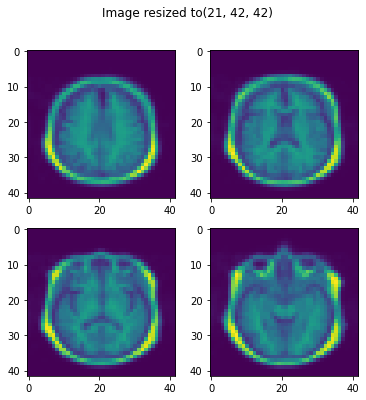

In [5]:
datanp=[]                               #images
truenp=[]                               #labels

data_dir = 'C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed2/CN'
for file in os.listdir(data_dir):
    data=np.load(os.path.join(data_dir,file),allow_pickle=True)
    datanp.append((data[0][0]))
    truenp.append(data[0][1])
    
img = datanp[0]  # loading the image

fig, axs1 = plt.subplots(2, 2,figsize= (6,6))

fig.suptitle('Image resized to'+str(img.shape))
i = 7
axs1[0, 0].imshow(img[i])

axs1[0, 1].imshow(img[i+1])

axs1[1, 0].imshow(img[i+2])

axs1[1, 1].imshow(img[i+3])


In [6]:
img

array([[[-0.02670658, -0.02670688, -0.02670677, ..., -0.02670679,
         -0.02670688, -0.02670688],
        [-0.02669753, -0.02670653, -0.02670233, ..., -0.02670579,
         -0.02670683, -0.0267067 ],
        [-0.02670467, -0.02670674, -0.02670593, ..., -0.02670669,
         -0.02670683, -0.02670672],
        ...,
        [-0.02670592, -0.02670616, -0.02668301, ..., -0.02670654,
         -0.0267068 , -0.02670386],
        [-0.02670688, -0.02670672, -0.02668344, ..., -0.02670675,
         -0.02670685, -0.02670634],
        [-0.02670688, -0.02670688, -0.02670602, ..., -0.02670687,
         -0.02670688, -0.02670688]],

       [[-0.02670681, -0.02670688, -0.02670678, ..., -0.02670678,
         -0.0267068 , -0.02670686],
        [-0.02670422, -0.02670664, -0.02670298, ..., -0.02670502,
         -0.02670451, -0.02670551],
        [-0.02670614, -0.02670678, -0.02670594, ..., -0.02670637,
         -0.02670395, -0.02670485],
        ...,
        [-0.02670667, -0.02670552, -0.02670568, ..., -

Try this other formula too (X − minX / maxX − minX) − 0.5